In [ ]:
from numpy import load
print("loading data")
data = load("/content/drive/My Drive/lungcancer/data_4.npy")
print("loading labels")
labels = load("/content/drive/My Drive/lungcancer/labels_4.npy")

loading data
loading labels


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.1, stratify=labels, random_state=42,shuffle = True)

In [ ]:
trainX.shape

(900, 512, 512, 1)

In [ ]:
trainY.shape

(900,)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug_train = ImageDataGenerator(rescale= 1.0/255.,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

aug_test  = ImageDataGenerator(rescale= 1.0/255.)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (512, 512, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(Dropout(0.5))

# Adding Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 32)      9

In [ ]:
import keras as k

In [ ]:
import time
NAME = "test_1-{}".format(int(time.time()))

In [ ]:
callbacks = [
#   k.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    k.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    k.callbacks.ModelCheckpoint('test_model_1.h5', save_best_only=True)]

In [ ]:
hist_1 = classifier.fit(aug_train.flow(trainX, trainY, batch_size=32),steps_per_epoch = 29, epochs = 50, verbose = 1,
                        validation_data = (testX, testY), callbacks=callbacks)

Epoch 1/50
29/29 [==============================] - 342s 11s/step - loss: 9.7920 - accuracy: 0.6076 - val_loss: 0.6509 - val_accuracy: 0.7129
Epoch 2/50
29/29 [==============================] - 324s 11s/step - loss: 0.6384 - accuracy: 0.6684 - val_loss: 0.9565 - val_accuracy: 0.7129
Epoch 3/50
29/29 [==============================] - 322s 11s/step - loss: 0.6207 - accuracy: 0.7147 - val_loss: 3.8757 - val_accuracy: 0.7129
Epoch 4/50
29/29 [==============================] - 322s 11s/step - loss: 0.6067 - accuracy: 0.7232 - val_loss: 15.0614 - val_accuracy: 0.7129
Epoch 5/50
29/29 [==============================] - 320s 11s/step - loss: 0.5889 - accuracy: 0.7102 - val_loss: 11.1595 - val_accuracy: 0.7129
Epoch 6/50
29/29 [==============================] - 322s 11s/step - loss: 0.5679 - accuracy: 0.7235 - val_loss: 49.3543 - val_accuracy: 0.7030
Epoch 7/50
29/29 [==============================] - 324s 11s/step - loss: 0.5602 - accuracy: 0.7205 - val_loss: 35.5849 - val_accuracy: 0.7030
Ep

In [ ]:
aug_train.fit(trainX)

Text(0.5, 0, 'Epoch')

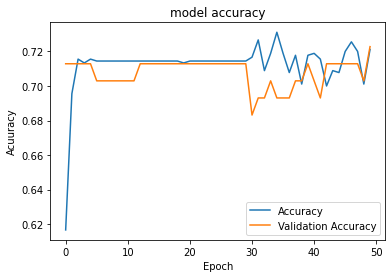

In [ ]:
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage as ndimage

# print accuracy graph
plt.plot(hist_1.history["accuracy"])
plt.plot(hist_1.history['val_accuracy'])
plt.title("model accuracy")
plt.legend(["Accuracy","Validation Accuracy"])
plt.ylabel("Acuuracy")
plt.xlabel("Epoch")

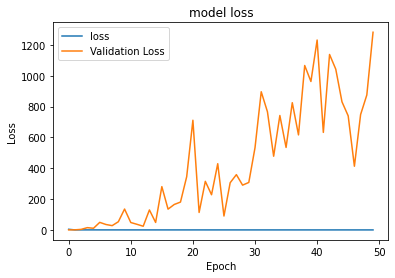

In [ ]:
# print loss graph
import matplotlib.pyplot as plt
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

classifier_2 = Sequential()

# Step 1 - Convolution
classifier_2.add(Conv2D(32, (3, 3), input_shape = (512, 512, 1), activation = 'relu'))

# Step 2 - Pooling
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier_2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
classifier_2.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a forth convolutional layer
classifier_2.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_2.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier_2.add(Flatten())

# Step 4 - Full connection
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 128, activation = 'relu'))
classifier_2.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        1

In [ ]:
import keras as k

In [ ]:
import time
NAME = "test_2-{}".format(int(time.time()))

In [ ]:
callbacks_2 = [
#    k.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
    k.callbacks.TensorBoard(log_dir='logs\{}'.format(NAME)),
    k.callbacks.ModelCheckpoint('test_model_2.h5', save_best_only=True)]

In [ ]:
hist_2 = classifier_2.fit(aug_train.flow(trainX, trainY, batch_size=32), steps_per_epoch=29, epochs = 50, verbose = 1,
                        validation_data = (testX, testY), callbacks=callbacks_2)

Epoch 1/50
29/29 [==============================] - 291s 10s/step - loss: 0.5667 - accuracy: 0.7144 - val_loss: 34.7380 - val_accuracy: 0.7129
Epoch 2/50
29/29 [==============================] - 289s 10s/step - loss: 0.5342 - accuracy: 0.7144 - val_loss: 32.0463 - val_accuracy: 0.7129
Epoch 3/50
29/29 [==============================] - 290s 10s/step - loss: 0.5272 - accuracy: 0.7144 - val_loss: 18.6073 - val_accuracy: 0.7129
Epoch 4/50
29/29 [==============================] - 290s 10s/step - loss: 0.5060 - accuracy: 0.7156 - val_loss: 57.5021 - val_accuracy: 0.6931
Epoch 5/50
29/29 [==============================] - 289s 10s/step - loss: 0.5060 - accuracy: 0.7156 - val_loss: 39.5869 - val_accuracy: 0.7129
Epoch 6/50
29/29 [==============================] - 292s 10s/step - loss: 0.5039 - accuracy: 0.7144 - val_loss: 45.8340 - val_accuracy: 0.7129
Epoch 7/50
29/29 [==============================] - 291s 10s/step - loss: 0.4762 - accuracy: 0.7167 - val_loss: 45.5392 - val_accuracy: 0.8020

Text(0.5, 0, 'Epoch')

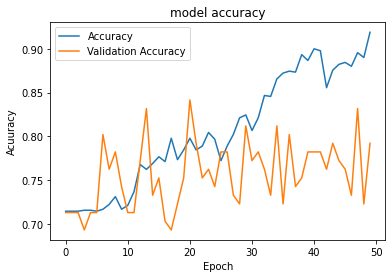

In [ ]:
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage as ndimage

# print accuracy graph
plt.plot(hist_2.history["accuracy"])
plt.plot(hist_2.history['val_accuracy'])
plt.title("model accuracy")
plt.legend(["Accuracy","Validation Accuracy"])
plt.ylabel("Acuuracy")
plt.xlabel("Epoch")

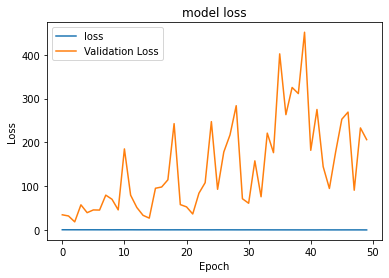

In [ ]:
# print loss graph
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])